In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Needs to be run once in the beginning
!pip install langdetect

     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=88dc9d0a44b062a78dacf987c8c1524476cff7f30a0fa9a71e42d949750f26cb
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [4]:
from langdetect import detect

In [5]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

df_pos = pd.read_csv('/content/drive/My Drive/Disinformation/Data/positive_articles.csv', sep=',')

df_neg = pd.read_csv('/content/drive/My Drive/Disinformation/Data/negative_articles.csv', sep=',')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print("Shape of df_pos:", df_pos.shape)
print("Shape of df_neg:", df_neg.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12547 entries, 0 to 12546
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_pk        12547 non-null  int64 
 1   domain_pk         12547 non-null  int64 
 2   domain_name       12547 non-null  object
 3   article_url       12547 non-null  object
 4   label             12547 non-null  int64 
 5   article_headline  11507 non-null  object
 6   article_text      12547 non-null  object
dtypes: int64(3), object(4)
memory usage: 686.3+ KB
Shape of df_pos: (12547, 7)
Shape of df_neg: (312, 7)


In [ ]:
# df_pos.sort_values(['article_text']).head(n = 20)
display(df_pos.iloc[11905].article_text)

"Skip to content\nBREITBART\nPolitics\nEntertainment\nMedia\nEconomy\nWorld\nLondon / Europe\nBorder / Cartel Chronicles\nIsrael / Middle East\nAfrica\nAsia\nLatin America\nWorld News\nVideo\nTech\nSports\nOn the Hill\nWires\nB Inspired\nAbout Us\nPeople\nBREITBART\nCoronavirus\nTwitter ‘Fact Check’\nCheat-by-Mail Battle\nBiden Troubles\nChina Coverup\nEXCLUSIVA: Narcoterrorista Mexicano Que Planeaba Volar Edificio Tenia Policías y Políticos en su Nomina\n99\nBreitbart Texas  / Cartel Chronicles\nIldefonso Ortiz\nand\nBrandon Darby\n16 May 2020\nMONTERREY, Nuevo León – Varios policías y políticos locales han sido arrestados o están siendo investigados por trabajar con un narcoterrorista que planeaba volar un edificio del gobierno local en el estado fronterizo de Nuevo León.\nBreitbart Texas reporto en exclusiva esta semana cuando las autoridades\nestatales y federales arrestaron a Adrián Alfonso “El Tráiler” Castillo Miguel, un capo regional que había planeado estallar un edificio de g

In [ ]:
display(df_neg.head(n = 10))

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text
0,42301915,14,independent.co.uk,https://www.independent.co.uk/news/uk/home-new...,0,East Kent maternity scandal: Inquiry begins af...,An investigation into East Kent Hospitals’ mat...
1,24447761,8,cnbc.com,https://www.cnbc.com/2020/03/28/coronavirus-li...,0,"NY Gov balks at federal quarantine talk, CDC w...",The coverage on this live blog has ended — but...
2,34129035,14,independent.co.uk,https://www.independent.co.uk//news/uk/home-ne...,0,Scammers carrying out sextortion cybercrimes d...,Scammers are carrying out sextortion cybercrim...
3,1397777,6,cbsnews.com,https://www.cbsnews.com/news/cbs-this-morning-...,0,"Listen to the ""CBS This Morning"" podcast","The ""CBS This Morning Podcast"" offers listener..."
4,14548788,1594,businessinsider.com,http://www.businessinsider.com/?IR=T,0,NaN,A vertical stack of three evenly spaced horizo...
5,34129924,17,lemonde.fr,https://www.lemonde.fr/blog/realitesbiomedical...,0,Covid-19 : quid de la contamination par voie o...,C’est l’histoire d’une Canadienne de 29 ans qu...
6,24447137,18,motherjones.com,https://www.motherjones.com/politics/2020/03/c...,0,The Surprising Pro-Trumpers Who Took the Coron...,For indispensable reporting on the coronavirus...
7,24447044,18,motherjones.com,https://www.motherjones.com/?p=820766,0,The Surprising Pro-Trumpers Who Took the Coron...,For indispensable reporting on the coronavirus...
8,42371145,1600,elpais.com,https://english.elpais.com/author/el-pais/,0,Articles written by EL PAÍS,EDITORIAL Nissan plant closure in Barcelona: a...
9,17360704,1600,elpais.com,https://english.elpais.com/news/economy_and_bu...,0,Economy And Business in EL PAÍS in English,CORONAVIRUS Spain’s proposal for travel corrid...


Problems with the data:
1. Some articles non-english
2. '\n', 'â' characters present
3. Duplicate article_text- different urls but article is same.
4. Name of the author of the article present

In [6]:
# Merge positive and negative data into one data frame
df = pd.concat([df_pos, df_neg])

df.label.value_counts(normalize=True)
# 97.57% data is positive and 2.42% data is negative.

1    0.975737
0    0.024263
Name: label, dtype: float64

In [ ]:
# df.reset_index(drop=True)
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12859 entries, 0 to 311
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_pk        12859 non-null  int64 
 1   domain_pk         12859 non-null  int64 
 2   domain_name       12859 non-null  object
 3   article_url       12859 non-null  object
 4   label             12859 non-null  int64 
 5   article_headline  11804 non-null  object
 6   article_text      12859 non-null  object
dtypes: int64(3), object(4)
memory usage: 803.7+ KB


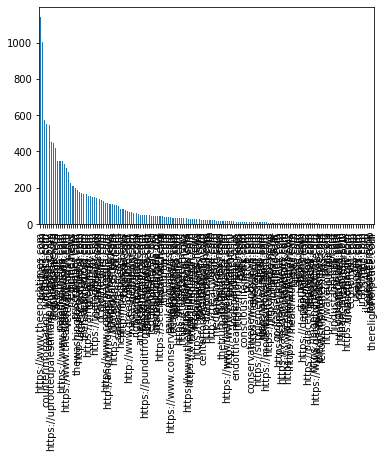

In [ ]:
df.domain_name.value_counts().plot(kind = 'bar')

# Cannot see much

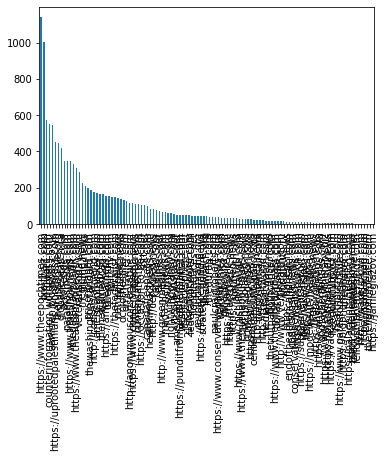

In [ ]:
df.loc[df['label'] == 1].domain_name.value_counts().plot(kind = 'bar')

# Not very useful

In [ ]:
df.loc[df['label'] == 1].domain_name.value_counts()

https://www.theepochtimes.com       1141
breitbart.com                       1005
infowars.com                         576
counterinformation.wordpress.com     553
aanirfan.blogspot.co.uk              543
                                    ... 
http://wakeupkiwi.com                  3
https://selfhacked.com                 2
vigilantcitizen.com                    2
thereligionofpeace.com                 1
https://jamieglazov.com                1
Name: domain_name, Length: 113, dtype: int64

In [ ]:
df.loc[df['domain_name'] == 'https://www.theepochtimes.com'].article_url.head(n=10)

# None of the urls are opening any page.

18    https://www.theepochtimes.com/man-paints-giant...
26    https://www.theepochtimes.com/mnuchin-grilled-...
27    https://www.theepochtimes.com/grocery-stores-g...
28    https://www.theepochtimes.com/clinical-trial-s...
38    https://www.theepochtimes.com/fda-approves-fir...
39    https://www.theepochtimes.com/amazon-turns-to-...
41    https://www.theepochtimes.com/flooding-hits-pa...
44    https://www.theepochtimes.com/rare-syndrome-ti...
45    https://www.theepochtimes.com/perspectives-on-...
46    https://www.theepochtimes.com/senate-will-wait...
Name: article_url, dtype: object

In [ ]:
df.loc[df['domain_name'] == 'breitbart.com'].article_url.head(n=10)

display(df.loc[df['domain_name'] == 'breitbart.com'].article_text[2:3])

158    Former Vice President Joe Biden published an o...
Name: article_text, dtype: object

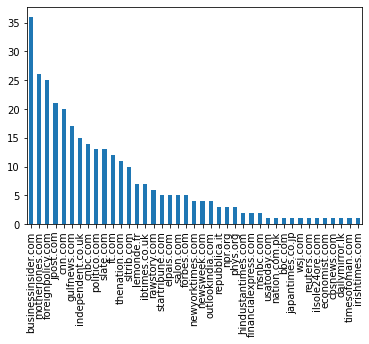

In [ ]:
df.loc[df['label'] == 0].domain_name.value_counts().plot(kind = 'bar')


In [21]:
# Subsetting label and article_text data
columns = ['label', 'article_text']
df_article_text = df[columns]
df_article_text.label.value_counts()

# display(df_article_text.groupby('article_text').sum()) ## Check for duplication

1    12547
0      312
Name: label, dtype: int64

In [ ]:
# df_article_text.iloc[11905]

label                                                           1
article_text    Skip to content\nBREITBART\nPolitics\nEntertai...
Name: 11905, dtype: object

In [22]:
# Removing duplicates in article_text the data

df_article_text.drop_duplicates(keep=False, inplace=True)

df_article_text.label.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    5695
0     244
Name: label, dtype: int64

In [23]:
df_article_text.reset_index(drop=True)
# df_article_text

,label,article_text
0,1,Democratic Gov. Gretchen Whitmer has made quit...
1,1,"Aangirfan\nFriday, 1 May 2020\nRANDOLPH STEWAR..."
2,1,This post was originally published on this sit...
3,1,The mayor of Los Angeles on Tuesday quickly ba...
4,1,Democratic Gov. Gretchen Whitmer has made quit...
...,...,...
5934,0,EDITOR’S NOTE: The Nation believes that helpin...
5935,0,EDITOR’S NOTE: The Nation believes that helpin...
5936,0,"As the coronavirus spreads across the globe, a..."
5937,0,ਸਾਇਨ ਇਨ\nਸਾਇਨ ਆਉਟ\nਤੁਹਾਡਾ ਸ਼ਹਿਰ\nਪੰਜਾਬ\nਮਾਝਾ\nਦ...


In [ ]:
# Index of non-english rows
non_en_index = []

#for index, row in df_article_text.iterrows():
#  lang = detect(row['article_text'])
#  if lang != 'en':
#    print(row['article_text'])
#    #print(lang)
#    print(index)

for i in range(0, len(df_article_text)):
  lang = detect(df_article_text.iloc[i]['article_text'])
  if lang != 'en':
    # print(df_article_text.iloc[i]['article_text'], lang)
    non_en_index.append(i)

In [17]:
len(non_en_index)

41

In [24]:
df_article_text.drop(df_article_text.index[non_en_index])

,label,article_text
0,1,Democratic Gov. Gretchen Whitmer has made quit...
1,1,"Aangirfan\nFriday, 1 May 2020\nRANDOLPH STEWAR..."
6,1,The mayor of Los Angeles on Tuesday quickly ba...
9,1,Democratic Gov. Gretchen Whitmer has made quit...
10,1,"Apparently, China really misses harassing NBA ..."
...,...,...
305,0,Service-industry workers are increasingly acti...
307,0,EDITOR’S NOTE: The Nation believes that helpin...
308,0,EDITOR’S NOTE: The Nation believes that helpin...
309,0,"As the coronavirus spreads across the globe, a..."


In [20]:
df_article_text.label.value_counts()

1    5695
0     244
Name: label, dtype: int64

Questions for GDI team:
1. Is there more data available, to make the datasets balanced?
2. Idea- making a column of article length.
3. theepochtimes - none of the links are available now.
4. What is being done right now?

*   Using only text as a predictor- challenge of some words existing only in the disinformation dataset. Later usage?
*   Is an either/ or okay for the project leads?


Ben sources narratives emerging, tracking it, labels a 100 positives/ negatives.
why 100? 

is there someone making checks on the articles he has labeled? no.
 model is trained on these articles? which model is he using?

Maggie- retraining this model, which model? what features is she using? what does she find? haven't used sentiment analysis for classification, valence used, intensity words, crawl daily, if they are not able to find the date, then the date in which the site was crawled. domain metadata domain model, article analysis model, 

how does the current covid model work? 
threshold for assigning domain level in

there is a list of sites as quality sites which they know are good sites- like new york times, dis- term that everyone is using and then they look for articles that meet that keywords, find as many articles as they can for those subnarratives, websites where they were getting several hits for dis subnarratives, keyword detector, how many articles the site posted about coronavirus,

the subnarratives are changed weekly, biweekly, for crawling which is done daily, etc.

keywords that were used to create the database- 5G, (will be shared by Maggie)
generalize more about the types of words used, phrases used.

Lucas- do some reading about coronavirus articles- come up with some narratives and identify disinformation articles. r/conspiracy theories, fortran. why? how to jump from article to domain level? domains which have been listed as disinformation sites, validation method- poynter. can get date the domain was added in the GDI database, article published date. [veracity is the scraper]

static data- build a model that can handle new data, new narratives, 

Vaughn - maintain a running bibliography. what do we think the scope is? present analysis of the data, summary analysis, visualisations.
